Eva Garcia, sciper 289028

# **EE-411, HomeWork 1 : Maximum Likelihood & Probability**

## 1 First passage time of a 1D Brownian particle
### 1)
As we assume the events are independant, the total probability density of observing n *independant* events simply becomes the multiplication of each individual events:
$$p(\{t_i\}_{i=1}^n | d, D) =  \prod_{i=1}^{n} p(\{t_i\} | d, D)$$

Therefore, the log-likelihood $\mathcal L({t_i}_{i=1}^n|d,D)$ becomes
$$\mathcal L({t_i}_{i=1}^n|d,D) = \frac{log(p(\{t_i\}_{i=1}^n|d,D))}{n} = \frac{1}{n}\sum_{i=1}^{n}log(dp(\{t_i\} | d, D)) =  \frac{1}{n}\sum_{i=1}^{n}log\left(\frac{d}{\sqrt{4\pi D t_i^3}}\exp\left(-\frac{d^2}{4Dt_i}\right)\right)$$

### 2) 
Simulation with $d = 2$ and $D$ generic, and $n$ observations.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


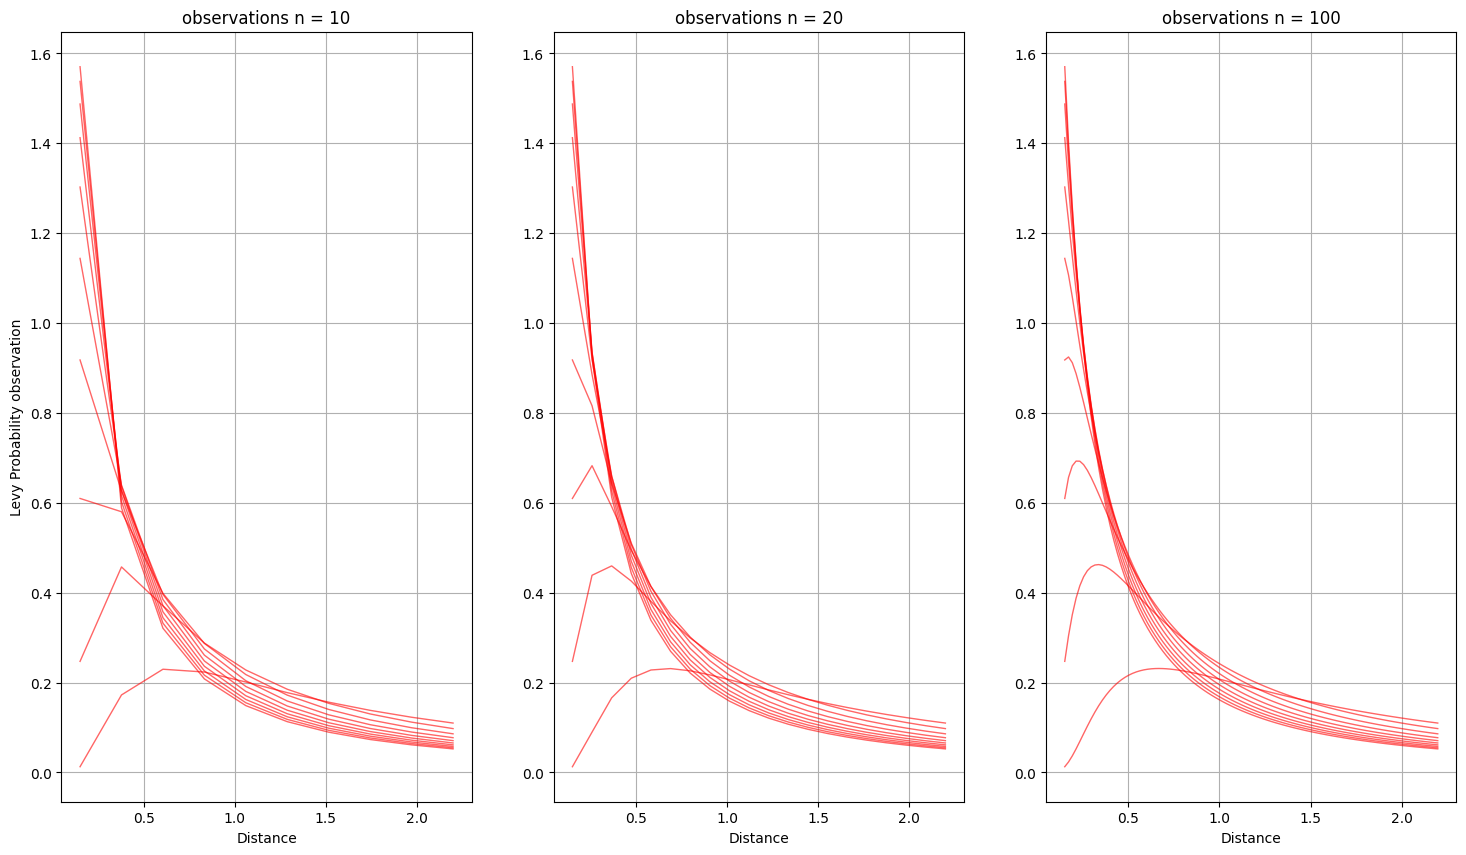

In [65]:
from ctypes import sizeof
from scipy.stats import levy
import matplotlib.pyplot as plt
import numpy as np
d = 2
D = np.linspace(1,10, 10)
n = [10,20,100]
loc = 0
i = 1
j = 1

fig, ax = plt.subplots(1, 3)
for i in range(len(n)):
    x = np.linspace(levy.ppf(0.01), levy.ppf(0.5), n[i])
    for j in range(len(D)):
        scale = d**2 / (2*D[j])
        l = levy.pdf(x, loc, scale)    
        ax[i].plot(x, l,'r-', lw=1, alpha=0.6)
        ax[i].grid(visible=1)
        ax[i].set_xlabel("Distance")
        ax[i].set_title('observations n = %i' %n[i])
ax[0].set_ylabel("Levy Probability observation")
    
plt.legend(loc='best', frameon=False)
fig.set_size_inches(18,10,forward=True)
plt.show()

### 3)
Maximum likelihood estimator given by:

$$ {\^D}_{ML}(\{t_i\}_{i=1}^n) = arg max_D \left( log( p(\{x_i\}_{i=1}^n|d,D))\right)  $$

And the Squared Error is defined as 

$$  SE =  ({\^D}_{ML}(\{t_i\}_{i=1}^n) - D^*)^2$$



In [57]:
from signal import default_int_handler
from scipy.optimize import minimize

n = [10,100,1000]
#minus in front of pdf as we want the maximum
def pdf (x, nb_obs, D):
    scale = d**2 / (2*D)
    result = - np.log(levy.pdf(x, 0, scale))
    return result
    
x_guess = np.random.uniform(0.1e-1, 1)
x = np.linspace(levy.ppf(0.01), levy.ppf(0.5), len(n))
i = 0
D_ML = []
SE = np.zeros(len(n))
D_unknown = np.zeros(len(n))

for i in range(len(n)):
    optimum = minimize (fun=pdf, x0=x_guess,args=(x,n[i],))
    D_ML.append(optimum.x)

i = 0
for i in range(len(D_ML)):
    D_unknown[i] = np.random.uniform(0.1e-3, 5)
    SE[i] = (D_ML[i] - D_unknown[i])**2

print("For observations of ",n)
print("Maximum Likelihood estimator: " ,D_ML)
print("Values of D*: ",D_unknown)
print("Squared Error: ", SE)

For observations of  [10, 100, 1000]
Maximum Likelihood estimator:  [array([0.06666666]), array([0.00666666]), array([0.52976462])]
Values of D*:  [1.78837612 3.59472743 3.00312176]
Squared Error:  [ 2.96428346 12.87418004  6.11749554]


C:\Users\osour\AppData\Local\Temp\ipykernel_8216\2187618902.py:8: RuntimeWarning: divide by zero encountered in log
  result = - np.log(levy.pdf(x, 0, scale))
C:\Users\osour\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\osour\AppData\Local\Temp\ipykernel_8216\2187618902.py:8: RuntimeWarning: divide by zero encountered in log
  result = - np.log(levy.pdf(x, 0, scale))
C:\Users\osour\AppData\Local\Temp\ipykernel_8216\2187618902.py:8: RuntimeWarning: divide by zero encountered in log
  result = - np.log(levy.pdf(x, 0, scale))
C:\Users\osour\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\osour\AppData\Local\Temp\i

### 4)
 Fisher information in this problem is given by :

$$ I_n(D) = nI(D) = n\mathcal{E}\left[\left( \frac{\partial}{\partial D}  \mathcal{L}\left( t|d,D \right)   \right)^2\right] = \frac{n}{2D^2}$$

And the Maximum As Posteriori (MAP) estimator is given by :

$$ \^D_J(\{x_i\}_{i=1}^n) = arg max_D \left( log\left( p(\{x_i\}_{i=1}^n|d, D)\sqrt{I(D)} \right) \right) =  arg max_D \left( log\left( p(\{x_i\}_{i=1}^n|d, D)\sqrt{\frac{1}{2D^2}} \right) \right) $$

In [56]:
from signal import default_int_handler
from scipy.optimize import minimize

n = [10,20,100]
def map(x, nb_obs, D):
    scale = d**2 / (2*D)
    l = levy.pdf(x, 0, scale)
    result = - np.log(l * np.sqrt(1/(2*D**2)))
    return result


x_guess = np.random.uniform(0.1e-1, 1)
x = np.linspace(levy.ppf(0.01), levy.ppf(0.5), len(n))

D_J = np.zeros(len(n))
SE = np.zeros(len(n))
D_unknown = np.zeros(len(n))

for i in range(len(n)):
    map_optimum = minimize (fun=map, x0=x_guess,args=(x,n[i],))
    D_ML.append(map_optimum.x)

i = 0
for i in range(len(D_J)):
    D_unknown[i] = np.random.uniform(0.1e-3, 5)
    SE[i] = (D_J[i] - D_unknown[i])**2

print("For observations of ",n)
print("Maximum Likelihood estimator: " ,D_J)
print("Values of D*: ",D_unknown)
print("Squared Error: ", SE)


For observations of  [10, 20, 100]
Maximum Likelihood estimator:  [0. 0. 0.]
Values of D*:  [2.26415672 0.16008475 2.51638222]
Squared Error:  [5.12640564 0.02562713 6.3321795 ]


C:\Users\osour\AppData\Local\Temp\ipykernel_8216\3584774956.py:8: RuntimeWarning: divide by zero encountered in log
  result = - np.log(l * np.sqrt(1/(2*D**2)))
C:\Users\osour\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\osour\AppData\Local\Temp\ipykernel_8216\3584774956.py:8: RuntimeWarning: divide by zero encountered in log
  result = - np.log(l * np.sqrt(1/(2*D**2)))
C:\Users\osour\AppData\Local\Temp\ipykernel_8216\3584774956.py:8: RuntimeWarning: divide by zero encountered in log
  result = - np.log(l * np.sqrt(1/(2*D**2)))
C:\Users\osour\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\osour\AppData\Local\

### 5)


C:\Users\osour\AppData\Local\Temp\ipykernel_8216\2187618902.py:8: RuntimeWarning: divide by zero encountered in log
  result = - np.log(levy.pdf(x, 0, scale))
C:\Users\osour\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\osour\AppData\Local\Temp\ipykernel_8216\2187618902.py:8: RuntimeWarning: divide by zero encountered in log
  result = - np.log(levy.pdf(x, 0, scale))
C:\Users\osour\AppData\Local\Temp\ipykernel_8216\2187618902.py:8: RuntimeWarning: divide by zero encountered in log
  result = - np.log(levy.pdf(x, 0, scale))
C:\Users\osour\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\osour\AppData\Local\Temp\i

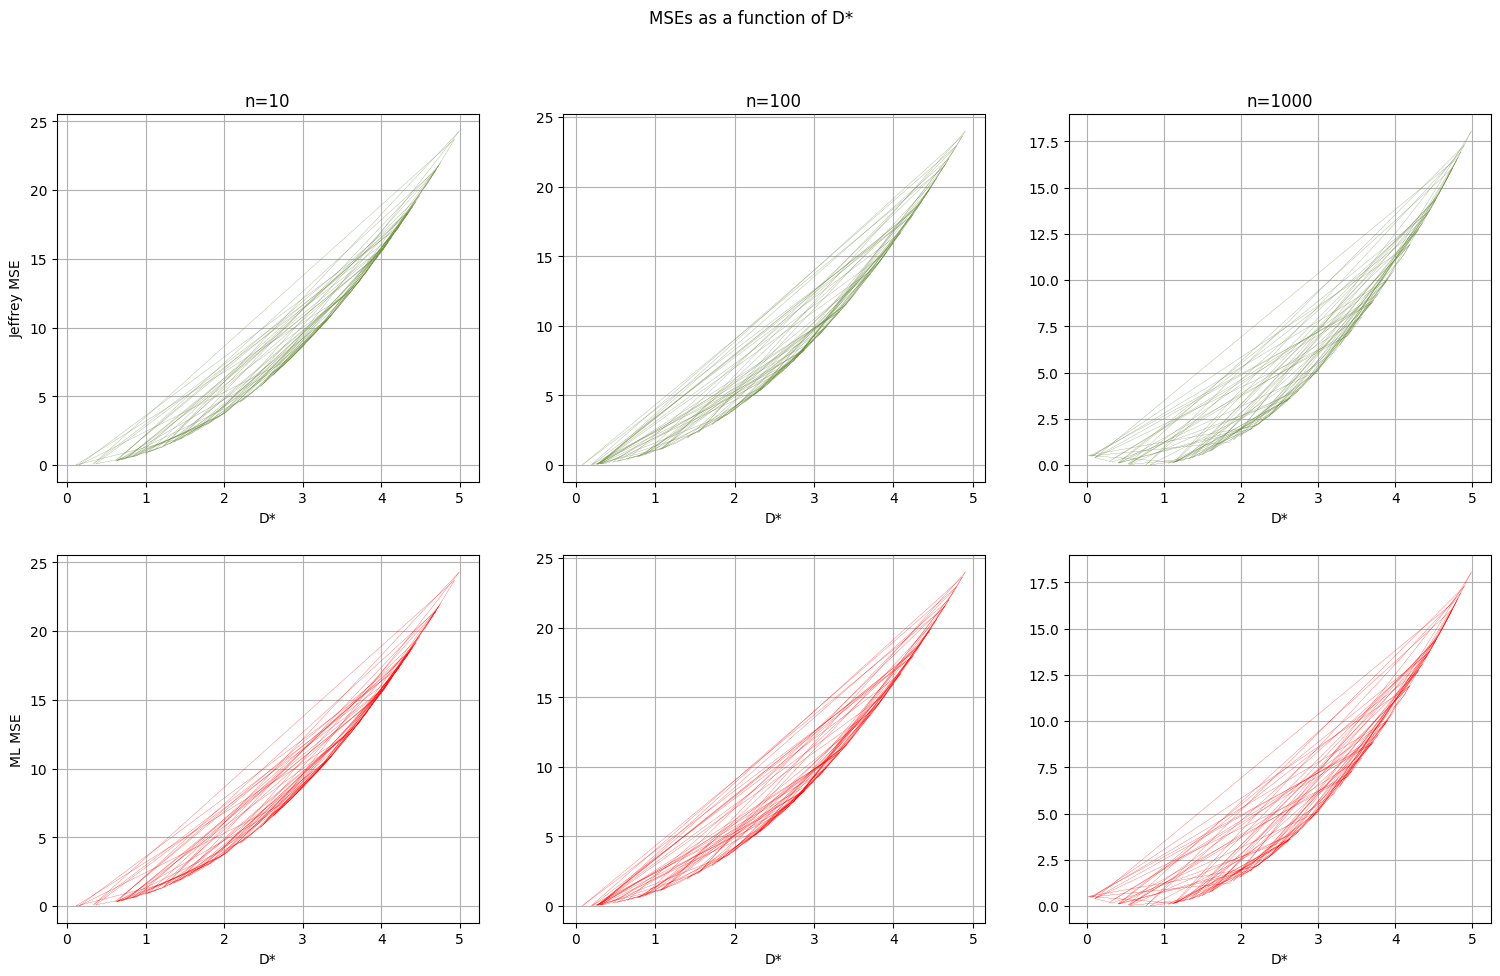

In [55]:
realizations = 100
i = 0
j = 0
n = [10,100,1000]
SE_j = np.zeros((realizations, len(n)))
SE_ml = np.zeros((realizations, len(n)))
D_unknown = np.zeros((realizations, len(n)))
label = ["Jeffreys", "ML"]
fig,ax = plt.subplots(2,3)
for j in range(len(n)):
    
    for i in range(realizations):
        estimator_j = minimize (fun=pdf, x0=x_guess,args=(x,n[j],)).x
        estimator_ml = minimize(fun=map, x0=x_guess,args=(x,n[j],)).x 
        D_unknown[i] = np.random.uniform(0.1e-3, 5)
        SE_j[i] = (estimator_j - D_unknown[i])**2
        SE_ml[i] = (estimator_ml - D_unknown[i])**2
    
    ax[0][j].plot(D_unknown,SE_j[:,j], lw=0.1, alpha=0.6)
    ax[1][j].plot(D_unknown,SE_ml[:,j], lw=0.1, alpha=0.6, color='r')
    ax[0][j].set_title('n=%i' %n[j])
fig.suptitle('MSEs as a function of D*')
ax[0][0].set_ylabel('Jeffrey MSE')
ax[1][0].set_ylabel('ML MSE')
for a in ax:
    for x in a:
        x.set_xlabel('D*')
        x.grid(visible=1)

fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()

## 6)

When n is large, equivalent to having a considerable amount of data, the maximum likelihood estimator saturates the Cramer-Rao bound. Which is one of the reasons to choose the ML estimator once n is large enough, as it is consistent


## 2 Probability bounds and a pooling problem

## 1) 

By defining $$ \hat{p} = \frac{1}{m} \sum_{i}{Z_i} $$

We can take the exponent and raise it to the power of m. It then gives us the following:

$$ P(\hat{p} \geq p + \epsilon) = P(exp(\lambda\hat{p})\geq exp(\lambda(p+\epsilon))) = P\left(exp\left(\lambda\sum_{i}{Z_i}\right)\geq e(m\lambda(p+\epsilon))\right) $$

By combining the hint given in the assignment and applying once again Markow's inequality, it gives us :

$$ P(\hat{p} \geq p + \epsilon) \leq \frac{\mathbb{E}[exp\left(\lambda\sum_{i}{Z_i}\right)]}{exp\left(m\lambda(p+\epsilon)\right)} = \frac{\mathbb{E}[exp\left(\lambda Z\right)]^{m}}{exp\left(m\lambda(p+\epsilon)\right)} $$

Finally, employing the expectation of a Bernoulli variable

$$ \mathbb{E} [exp\left(\lambda Z\right)] = p\cdot exp(\lambda) + (1-p)$$

It leads us to:

$$ P(\hat{p} \geq p + \epsilon) \leq \left(\frac{p\cdot exp(\lambda) + (1-p)}{exp(\lambda(p+\epsilon))}\right)^m $$

## 2)
Again, by employing the hint given in the assignment, we can take the right-hand side log to get:

$$
\log{f(p,\epsilon,\lambda)}\ =\ \log{\left(\left(\frac{pe^\lambda + (1-p)}{e^{\lambda(p+\epsilon)}}\right)^m\right)}\ =\ m\cdot\log{\left(\frac{pe^\lambda + (1-p)}{e^{\lambda(p+\epsilon)}}\right)}$$

Which gives us the follow

$$
m\cdot \left(\log{\left(p\cdot e^\lambda + (1-p)\right)}-\log{\left(e^{\lambda(p+\epsilon)}\right)}\right)\ =\ m\cdot\log{\left(p\cdot e^\lambda + (1-p)\right)} - m(\lambda(p+\epsilon))
$$

The minimum can be found by taking the point in which the derivative of the above expression is equal to 0 relative to $\lambda$:


$$\frac{d}{d\lambda}f(p,\epsilon,\lambda^*)\ = 0 $$

$$ \rightarrow m(\frac{pe^{\lambda^*}}{(pe^{\lambda^*} + (1-p))})-m(p+\epsilon) = 0 $$

$$ \rightarrow  \frac{pe^{\lambda^*}}{(pe^{\lambda^*} + (1-p))} = (p+\epsilon)$$
$$\rightarrow  p\cdot e^{\lambda^*} = (p+\epsilon)(pe^{\lambda^*} + (1-p))$$
$$\rightarrow  e^{\lambda^*} p(1-(p+\epsilon)) = (p+\epsilon) (1-p)$$
$$\rightarrow  e^{\lambda^*} = \frac{(p+\epsilon) (1-p)}{p(1-(p+\epsilon))}$$

By injecting the above expression into the inequality, we get the desired expression:
$$
\begin{align}
P\left(\hat{p} \geq p + \epsilon\right) \leq\ &\left(\frac{pe^\lambda + (1-p)}{e^{\lambda(p+\epsilon)}}\right)^m \\
\leq\ & \left(\frac{(p\frac{(p+\epsilon)) (1-p)}{p(1-(p+\epsilon))} + (1-p)}{e^{\log{\left(\frac{(p+\epsilon) (1-p)}{p(1-(p+\epsilon))}\right)}(p+\epsilon)}}\right)^m\\
\leq\ & \left(\frac{\frac{(p+\epsilon) (1-p)}{1-(p+\epsilon)} + \frac{(1-p)1-(p+\epsilon)}{1-(p+\epsilon)}}{e^{\log{\left(\frac{(p+\epsilon) (1-p)}{p(1-(p+\epsilon))}\right)}(p+\epsilon)}}\right)^m\\
\leq\ & \left(\frac{\frac{(1-p)}{1-(p+\epsilon)} }{e^{\log{\left(\frac{(p+\epsilon) (1-p)}{p(1-(p+\epsilon))}\right)}(p+\epsilon)}}\right)^m\\
\leq\ & \left(\frac{e^{\log{\left(\frac{(1-p)}{1-(p+\epsilon)}\right)}} }{e^{\log{\left(\frac{(p+\epsilon) (1-p)}{p(1-(p+\epsilon))}\right)}(p+\epsilon)}}\right)^m\\
\leq\ & \left(e^{\left(\log{\left(\frac{(1-p)}{1-(p+\epsilon)}\right)}- (p+\epsilon)\log{\left(\frac{1-p}{1-(p+\epsilon)}\right)}-(p+\epsilon)\log{\left(\frac{p+\epsilon}{p}\right)}\right)m}\right) \\
\leq\ & \left(e^{\left(\log{\left(\frac{(1-p)}{1-(p+\epsilon)}\right)} \left(1 - (p+\epsilon)\right)-(p+\epsilon)\log{\left(\frac{p+\epsilon}{p}\right)}\right)m}\right) \\
\leq\ & \left(e^{-\left(\log{\left(\frac{1-(p+\epsilon)}{(1-p)}\right)} \left(1 - (p+\epsilon)\right) + (p+\epsilon)\log{\left(\frac{p+\epsilon}{p}\right)}\right)m}\right) \ =\ e^{-mf(p,\epsilon)} \\
\end{align}
$$

## 3)

We have:

$$
f(p,\epsilon)\ = \ \log{\left(\frac{1-(p+\epsilon)}{(1-p)}\right)} \left(1 - (p+\epsilon)\right) + (p+\epsilon)\log{\left(\frac{p+\epsilon}{p}\right)}
$$

$$
f(p,0)\ =\ \log{\left(\frac{1-(p+ 0 )}{(1-p)}\right)} \left(1 - (p+ 0)\right) + (p+0)\log{\left(\frac{p+0}{p}\right)}\\ f(p,0)\ =\ 0 
$$

$$
\frac{df(p,\epsilon)}{d\epsilon}\big|_{\epsilon = 0} = \log{\left(\frac{p+\epsilon}{p}\right)}+\frac{p}{p+\epsilon}\frac{p+\epsilon}{p}-\log{\left(\frac{1-(p+\epsilon)}{1-p}\right)} -\frac{1}{1-p}\frac{1-p}{(1-(p+\epsilon))}(1-(p+\epsilon))\ \big|_{\epsilon = 0}\\

= \log{\left(\frac{p+\epsilon}{p}\right)} + 1 - \log{\left(\frac{1-(p+\epsilon)}{1-p}\right)} - 1\ \big|_{\epsilon = 0} = 0
$$

Here we will equalize the third derivative to zero, so as to find the maxima:

$$\begin{align}
\frac{d^2f(p,\epsilon)}{d\epsilon^2}\ &=\ \frac{1}{p}\frac{p}{p+\epsilon}+\frac{1}{1-p}\frac{1-p}{1-(p+\epsilon)}\\
&=\ \frac{1}{p+\epsilon}\frac{1}{1-(p+\epsilon)} \\
\frac{d^3f(p,\epsilon)}{d\epsilon^3}\ &=\ \frac{2(p+\epsilon)+1}{(p+\epsilon-1)^2(x+p)^2}\ = 0 \\
\ &=\ (p+\epsilon) = \frac{1}{2}
\end{align}\\
\rightarrow \frac{d^2f(p,\epsilon)}{d\epsilon^2} \big|_{(p+\epsilon)= \frac{1}{2}}\ = 4
$$

## 4)
By starting off with what we found in 3), we can get the following Taylor expression:

$$
\begin{align}
f(p, \epsilon)\ &=\ f(p,0) +\epsilon f'(p,0) + \frac{\epsilon ^2}{2}f''(p,\tilde{\epsilon})\\
& =\ 0 + 0 + \frac{\epsilon ^2}{2}f''(p,\tilde{\epsilon})
\end{align}
$$
Knowing that :

$$ \frac{d^2f(p,\epsilon)}{d\epsilon^2} \geq 4 $$

for the right hand side, it leads us to conclude that: 

$$
f(p, \epsilon)\ \geq \frac{\epsilon ^2}{2} \cdot 4\ =>\ f(p, \epsilon)\ \geq \epsilon ^2 2
$$

We can therefore conclude the proof of number 5 with this inequality, seeing that the minimum value of $f(p,\epsilon)$ is equal to $\epsilon ^2 2$. By injecting this into the equation from 2), the desired expression is found : 
$$
P\left(\frac{1}{m}\sum_{i}Z_i \geq p+ \epsilon \right) \leq e^{-2m\epsilon ^2}
$$

## 5)

In [7]:
import numpy as np
import pandas as pd
from scipy.stats import bernoulli
from scipy import stats
import matplotlib.pyplot as plt


p_lis = [0.2, 0.5, 0.8]
m_th = 18444

def bernouilli(p, m):
    el = bernoulli.rvs(p, size = m)
    return el

error = []
cnt = 0
cnt_m = []


for x, p in enumerate(p_lis):
    for i in range(1, 100):

        elements = bernouilli(p,m_th)
        p_estim = elements.sum()/len(elements)
        error = (p-p_estim)/p

        if error < 0.01:
            cnt = cnt+1

    print(f"p =",p, ",probability of error less than  1% : ",cnt/100)
    cnt_m.append(cnt/100)
    
    cnt = 0

p = 0.2 ,probability of error less than  1% :  0.73
p = 0.5 ,probability of error less than  1% :  0.94
p = 0.8 ,probability of error less than  1% :  0.99


We can therefore deduce that the percentage for which the error is less than 1% decreases with p. Anyway, the bounds are still accurate.


In [ ]:
k = np.linspace(1, 10, 10)
m_range = m_th*k
error = []
cnt = 0
for p in p_lis:
    for m in m_range:
        for i in range(1, 100):
            elements = bernouilli(p,int(m))
            p_estim = elements.sum()/len(elements)
            error = (p - p_estim)/p
            if error < 0.01:
                cnt = cnt + 1
        print(f"p =",p, ",k =", np.where(m_range == m)[0], ",probability of error < 1%:",cnt/100)
        elements = []
        count = 0

The final analysis indicates that, by comparing the consequences of using different coefficients, special attention is needed when p is at it's lowest, \textit{e.g.} at 0.2. For k bigger than 6, which means that we calculated 6 times the theoretical value of m, the error percentage is higher than 95% for each p.


## Bonus 4:

C:\Users\osour\AppData\Local\Temp\ipykernel_7712\2671885137.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


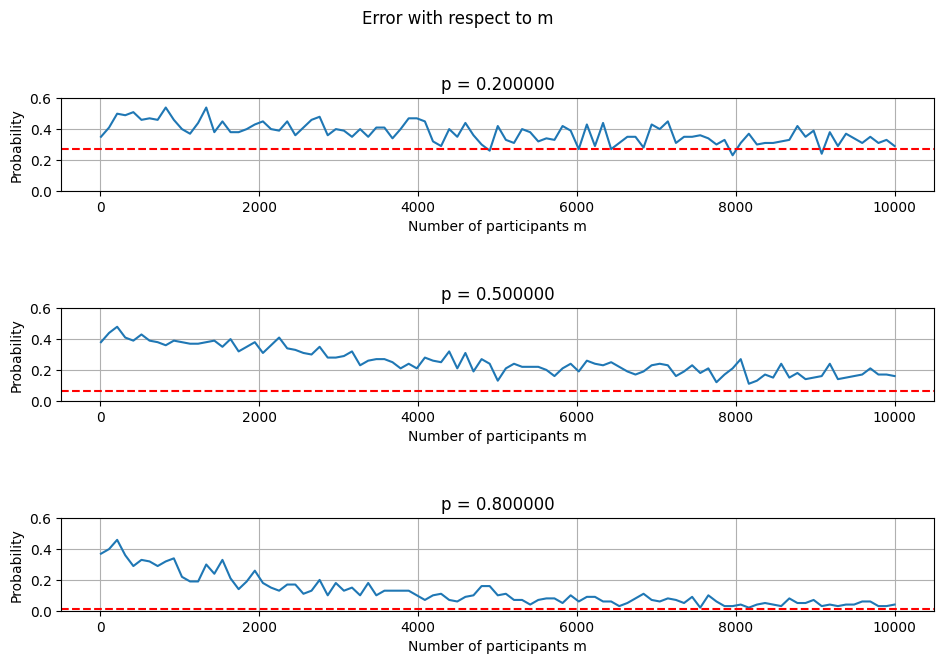

In [29]:
fig, axes = plt.subplots(3, 1)
m_bonus = np.linspace(10, 10000, 99)
error = []
cnt = 0
cnt_x = []

for x, p in enumerate(p_lis):
    for m in m_bonus:
        for i in range(1, 100):
            elements = bernouilli(p,int(m))
            p_estim = elements.sum()/len(elements)
            error = (p-p_estim)/p
            if error < 0.01:
                cnt = cnt + 1
        cnt_x.append(1-(cnt/100))
        elements = []
        cnt = 0



    ax = axes[x]
    ax.plot(m_bonus,cnt_x)
    ax.set_title(f'p = %f' % p)
    ax.set_ylim(0,0.6)
    ax.axhline(1 - cnt_m[x], c='r', ls='--')
    ax.set_ylabel("Probability")
    ax.set_xlabel("Number of participants m")
    ax.grid(visible=1)
        
    cnt_x = []

    fig.suptitle('Error with respect to m')
fig.tight_layout()
fig.set_size_inches(10,7, forward=True)
fig.show()
    


The horizontal lines represents the probability with $m^*$. We can observe that the probability of the error being larger that 1% decreases as m increases. As $m^*$ is larger than our \textit{maxima} value for $m$ equal 10000, it makes sense that it almost always lower than the tested values.  

However, this is not entirely true for $p=0.2$

I collaborated with Sinan Ulcay for this homework.